# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of serious accidents. The safety team classes serious accidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these serious accidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

accidents = pd.read_csv("data/accident-data.csv")
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most serious accidents happen?
2. Are there any patterns in the time of day/ day of the week when serious accidents occur?
3. What characteristics stand out in serious accidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

Let's see the dataset infos

### 📖  Conclusions of the dataset exploratory :
In the notebook I explore the dataset by separating fatal accidents and all accidents in order to display some patterns of fatal accidents. We can clearly observe that fatal accidents happen mainly in rural areas at 60 speed limit. After this exploration I can make some recommendations in order to decrease fatal accidents by priorizing them according to there arranging ease and effectiveness :

1. Increase police controls on the road axes : LONDON-OXFORD-BIRMINGHAM-LEICESTER-MANCHESTER-LIVERPOOL during week-ends
2. Promote remote working in order to unclug the roads at the 7am-8am and 3pm-6pm and avoiding that everyone hits the road during week-ends
3. Promote and develop public transports (especially between the axes LONDON-OXFORD-BIRMINGHAM-LEICESTER-MANCHESTER-LIVERPOOL)
4. Intoxicated driving intervention and sensibilisation (many accidents during sunday at 1am)
5. Decrease speed limits in rural area, especially when there are poor light conditions between big cities
6. Create more physical crossing facilities in urban areas
7. Put a stop sign at the give way junctions


In [91]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


#### Exploration of the dataset

In [109]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91199 non-null  object        
 1   accident_year                            91199 non-null  int64         
 2   accident_reference                       91199 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91199 non-null  int64         
 6   number_of_vehicles                       91199 non-null  int64         
 7   number_of_casualties                     91199 non-null  int64         
 8   date                                     91199 non-null  object        
 9   day_of_week                            

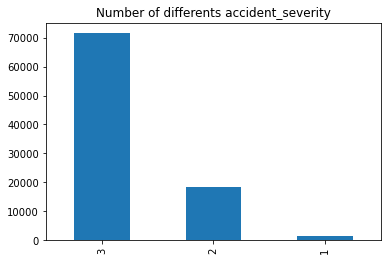

In [110]:
accidents.accident_severity.value_counts().plot.bar()
plt.title("Number of differents accident_severity");

We observe a very few proportion of fatal accidents. We will study this proportion in details.

In [111]:
accidents["day"] = accidents.day_of_week.replace({1:"Sun", 2:"Mon", 3:"Tues", 4:"Wed", 5:"Thur", 6:"Fri", 7:"Sat"})
accidents.time = pd.to_datetime(accidents.time)
accidents["hour"] = accidents.time.apply(lambda x: x.hour)

<div class="alert alert-success">
    <h1>STEP 1 : WHEN and WHERE the accidents occur.

To anwser more accurately this question let's build a schedule heatmap.
Let's do a schedule heatmap between days of the week and time of the day and let's look at the hottest points.

<div class="alert alert-danger">
<h3> First : All the accidents

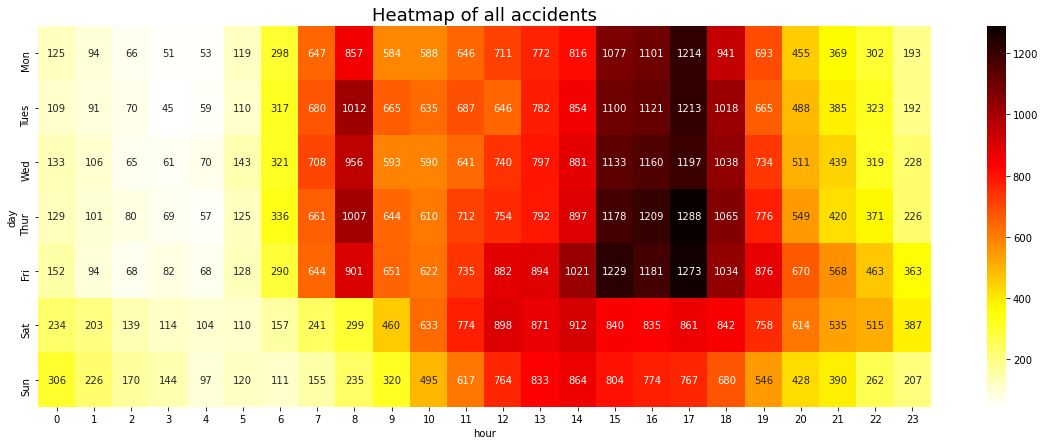

In [114]:
days = ['Mon','Tues','Wed', 'Thur', 'Fri', 'Sat', 'Sun']
c = pd.crosstab(accidents.day, accidents.hour)
c = c.reindex(days)
plt.figure(figsize=(20,7))
sns.heatmap(c, annot = True, cmap = "hot_r", fmt='g' )
plt.title("Heatmap of all accidents", fontsize = 18);

<div class="alert alert-info">
    <b> Observation </b>On this heatmap the insight is clear: most of accident occur during the way to work (between 7 and 8 am from monday to friday) and the way back home (between 3 and 6 pm from monday to friday).

<div class="alert alert-info">
    <b> Recommendations</b> : Promote remote work when it is possible in order to unclog the roads at those times

<div class="alert alert-danger">
<h3> Second : Only fatal accidents

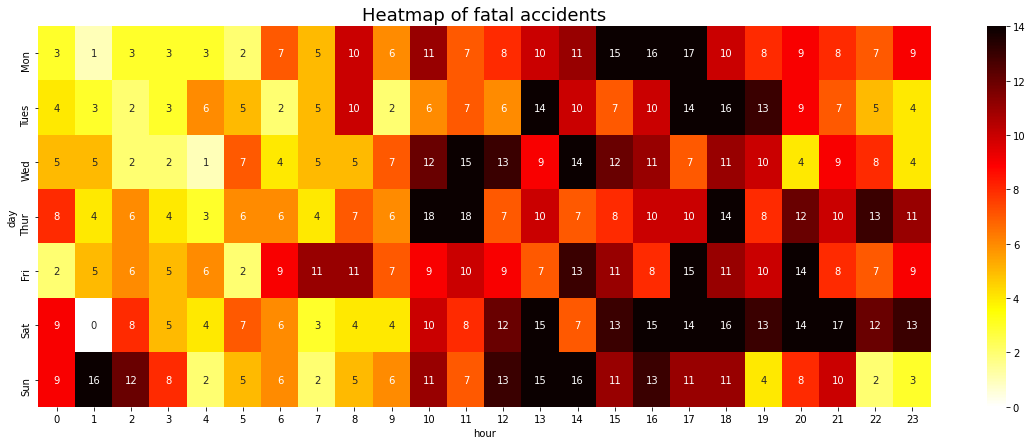

In [115]:
plt.figure(figsize=(20,7))
c = pd.crosstab(major_accident.day, major_accident.hour)
c = c.reindex(days)
sns.heatmap(c, annot = True, cmap = "hot_r", vmax = 14);
plt.title("Heatmap of fatal accidents", fontsize = 18);

<div class="alert alert-info">
    <b> Observation </b>The pattern between all accidents and fatal accident is quite different. There is not clear explanation as before.
However we note some hot points :
1. On Thursday : between 10 and 11 am
2. On Saturday afternoon
3. On Sunday at lunchtime and 
    at 1 am/2 am : #recommendation : Intoxicated driving intervention and sensibilisation
4. On Monday afternoon
5. Of course overall the most probability is during daylight

<div class="alert alert-danger">
<h3> WHERE ?

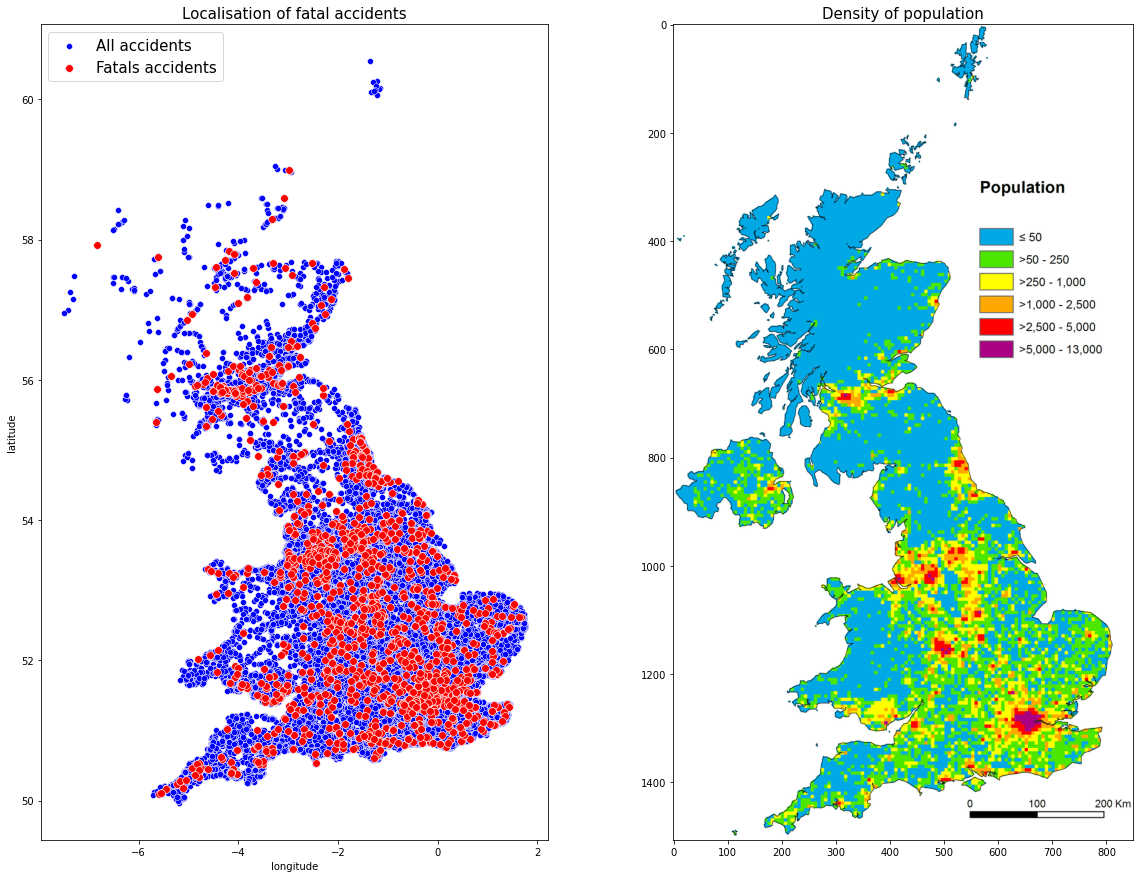

In [116]:
plt.figure(figsize= (20,15))
plt.subplot(1,2,1)
sns.scatterplot(data = accidents, x = "longitude", y = "latitude", color = "blue", label = "All accidents")
sns.scatterplot(data = major_accident, x = "longitude", y = "latitude", color = "red", s= 60, label = "Fatals accidents")
plt.title("Localisation of fatal accidents", fontsize = 15)
plt.legend(fontsize = 15)

plt.subplot(1,2,2)
img = mpimg.imread("GB_density.png")
plt.imshow(img)
plt.title("Density of population", fontsize = 15);

<h4> It's quite clear that the density of fatal accidents follows the density of population

During week end it seemed that the occurence of fatal accidents was more important. Let's create the same map only for fatal accidents during week end :

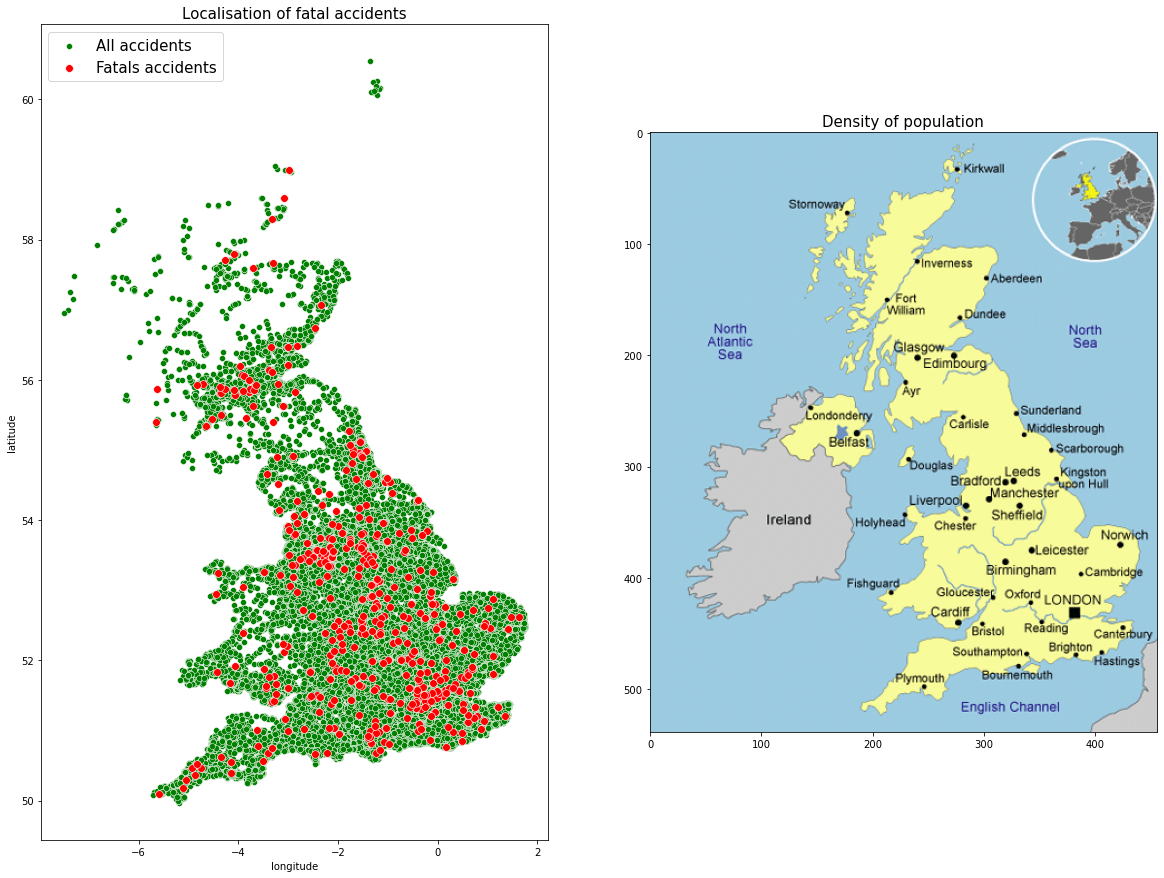

In [117]:
plt.figure(figsize= (20,15))
plt.subplot(1,2,1)
sns.scatterplot(data = accidents, x = "longitude", y = "latitude", color = "green", label = "All accidents")
sns.scatterplot(data = week_end, x = "longitude", y = "latitude", color = "red", s= 60, label = "Fatals accidents")
plt.title("Localisation of fatal accidents", fontsize = 15)
plt.legend(fontsize = 15)

plt.subplot(1,2,2)
img = mpimg.imread("gb_cities.png")
plt.imshow(img)
plt.title("Density of population", fontsize = 15);

<div class="alert alert-info">
    <b> Observation </b>On the  map we can see the main roads where fatal accidents occur :
-- > The axe LONDON-OXFORD-BIRMINGHAM-LEICESTER-MANCHESTER-LIVERPOOL

<div class="alert alert-info">
    <b> Recommandation :</b>
<ul>1. Decrease the speed limits on these roads</ul>
<ul>2. Increase police controls on these roads during week end</ul>

<div class="alert alert-success">
    <h1>STEP 2 : More than only days and time we have to check if other variable influence the occurence of a fatal accident.

To do that we will explore the distribution of the other variables

In [118]:
#We gather all categorical variables
var_cat = major_accident[major_accident.loc[:,major_accident.dtypes==np.int64].columns]

In [119]:
#To analyse the categorical variable we will take only variables with less than 20 modalities in order to plot them

for i in var_cat.columns:
    if accidents[i].nunique() > 30 :
        print(f'la variable {i} a {accidents[i].nunique()} modalités')

la variable first_road_number a 3068 modalités
la variable second_road_number a 2274 modalités


In [ ]:
#We delete the two variables with too many modalities and accident_year beacause there is only one year
var_cat.drop(["first_road_number", "second_road_number",'accident_year'], axis=1, inplace= True)

<div class="alert alert-danger">
<h3> Variables correlation with accident_severity

With V Cramer test we can measure the correlation between two qualitative variables. We are going to compare each variable with the variable accident_severity in order to display wich variables influence the most the severity of a accident

In [121]:
import math

def V_Cramer(tableau, N):
    r = table.shape[1]
    k = table.shape[0]
    k_corr = k - (k-1)**2 / (N-1)
    r_corr = r - (r-1)**2 / (N-1)
    phi2 = max(0,chi2_contingency(table)[0]/N - (k-1)*(r-1) / (N-1))
    V = math.sqrt(phi2 / min(k_corr-1,r_corr-1))
    return V

line =[]
p_values=[]
variable_dep = []
for var in var_cat.columns:
    table = pd.crosstab(accidents["accident_severity"], accidents[var])
    Khi2, p, dof, ex = chi2_contingency(table)
    if p<0.05:
        line.append(V_Cramer(table, accidents.shape[0]))
        p_values.append(p)
        variable_dep.append(var)
        
df_cramer = pd.DataFrame(zip(line,p_values), columns =["V_Cramer (accident_severity)", "p_values"], index=variable_dep)
df_cramer.sort_values(by=("V_Cramer (accident_severity)"), ascending = False)

,V_Cramer (accident_severity),p_values
accident_severity,1.000000,0.000000e+00
number_of_vehicles,0.097911,0.000000e+00
speed_limit,0.097220,0.000000e+00
urban_or_rural_area,0.082825,1.708602e-270
junction_detail,0.069935,2.112251e-180
junction_control,0.069670,6.435629e-186
light_conditions,0.067448,5.831582e-174
pedestrian_crossing_physical_facilities,0.059857,2.215685e-133
number_of_casualties,0.059434,1.118149e-122
hour,0.052924,6.996457e-89


<div class="alert alert-info">
    <b> Observation </b>
<p>This dataframe shows in a descending order the V Cramer test. V Cramer test range is [0-1]. 1 means highly correlated. We can see here that all variables are weakly correlated to the severity of accidents.

<div class="alert alert-info">
<p>This information is very important because it tells that although there is a correlation (p_value is less than 0.05), the strenght between severity of accident and the other variables is quite weak. What does it mean ? It means than to decrease fatal acccidents we have to search for decreasing all accidents.

For the next step we will visualize the distribution of each variable in order to catch which modalities of the variable we observe the highest probability of the severity of the accident.

<div class="alert alert-info">
<p>Before we will get rid of :
<ul>1. number_of_vehicles : because it's more a consequence than a cause and doesn't give any useful information about the relation cause/effect on accident severity</ul>
<ul>2. number_of_casualties : same reason as number_of_vehicles</ul>
<ul>3. Day of week and hour because we already analysed it</ul>

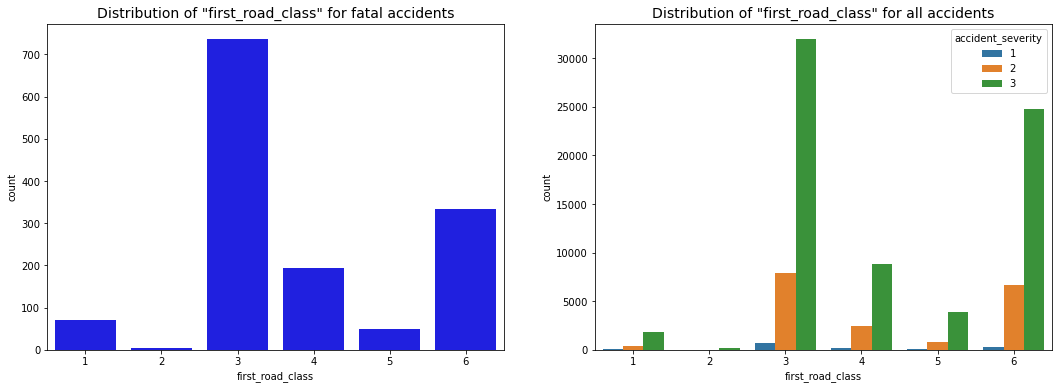

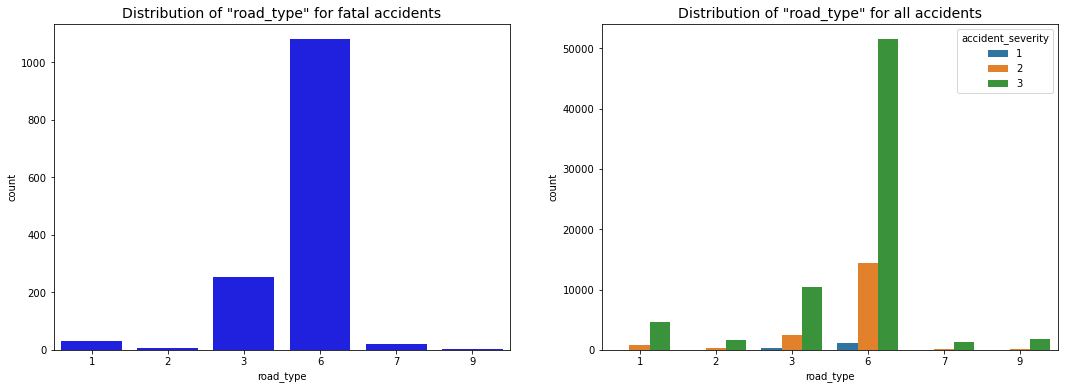

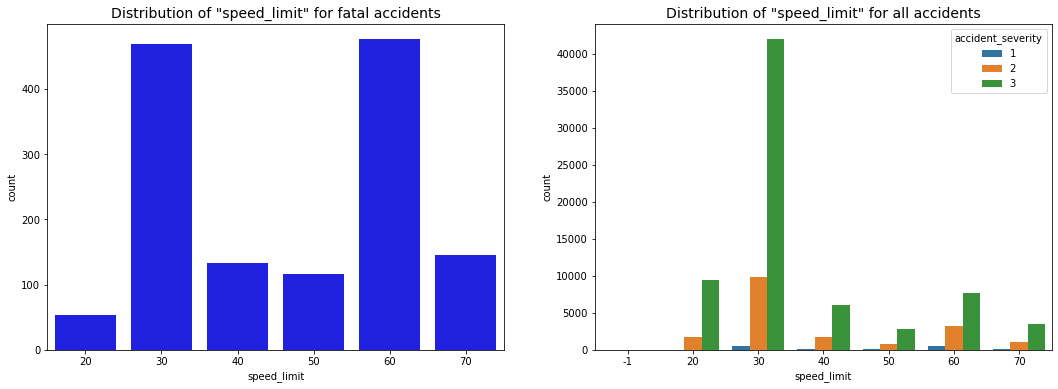

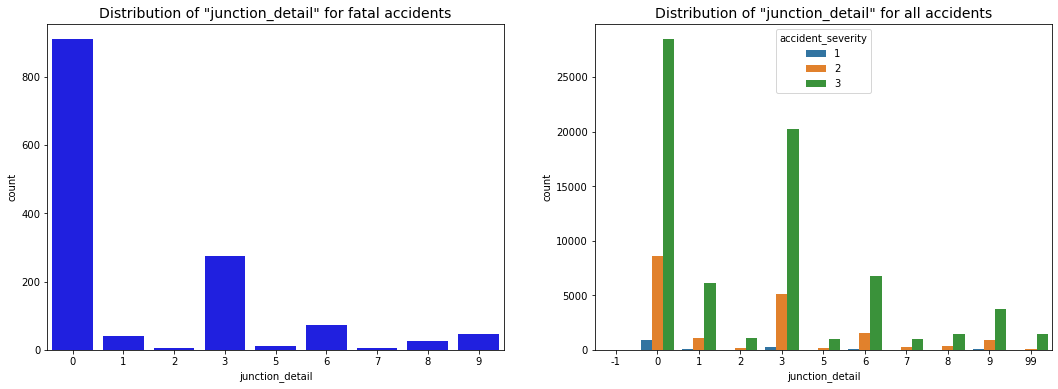

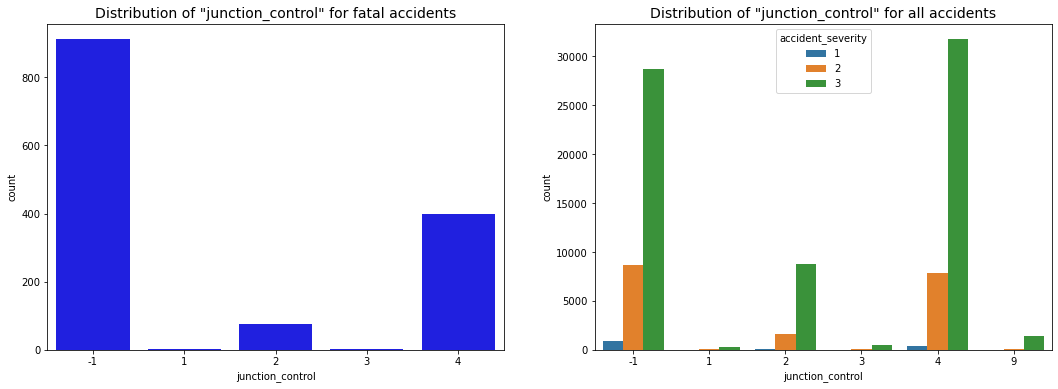

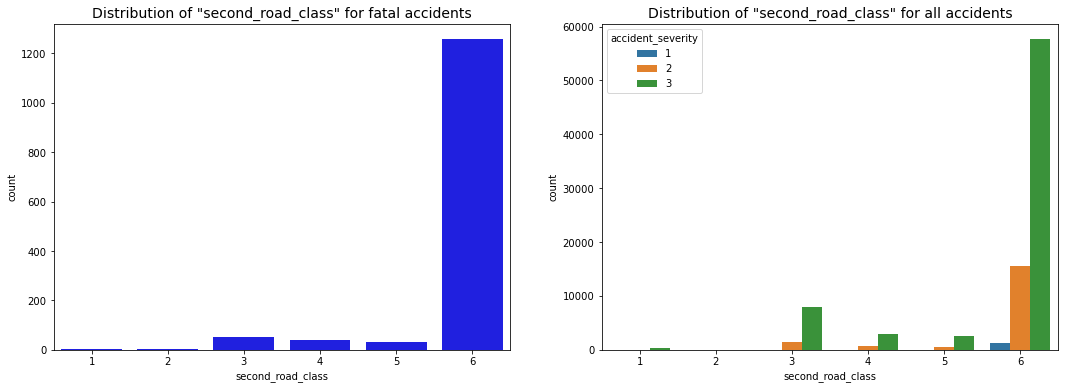

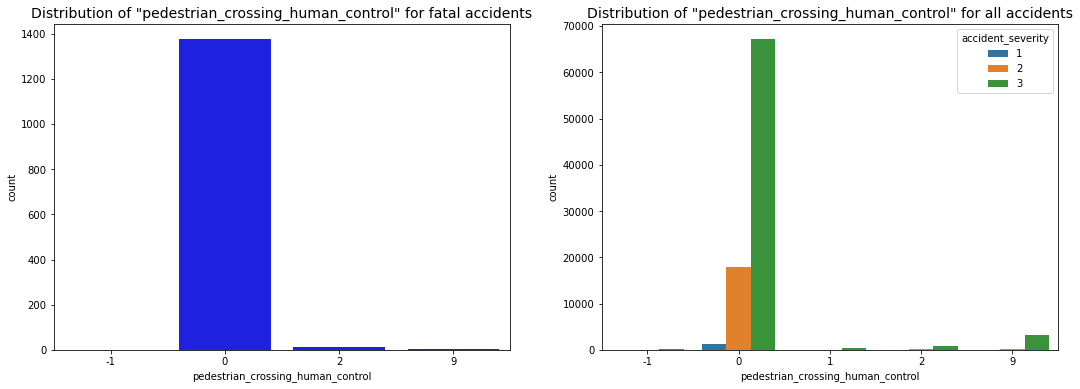

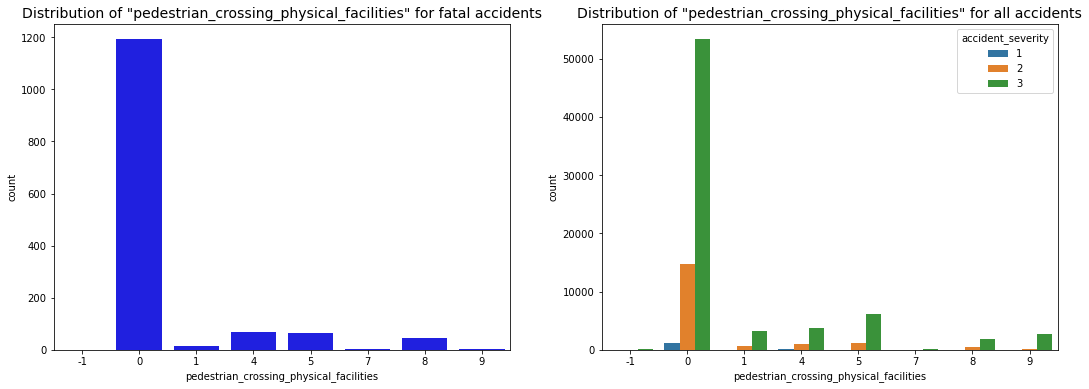

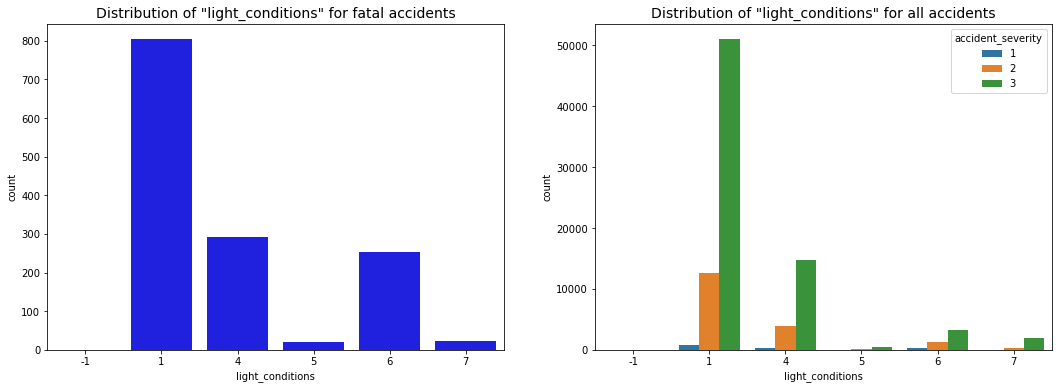

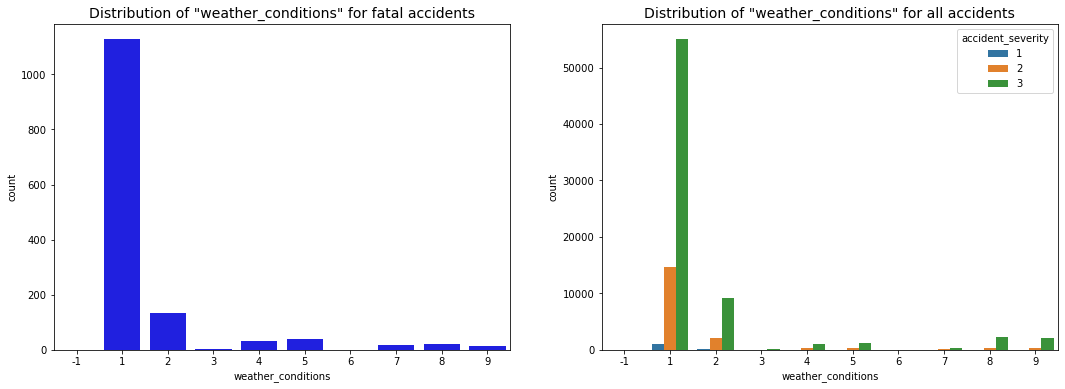

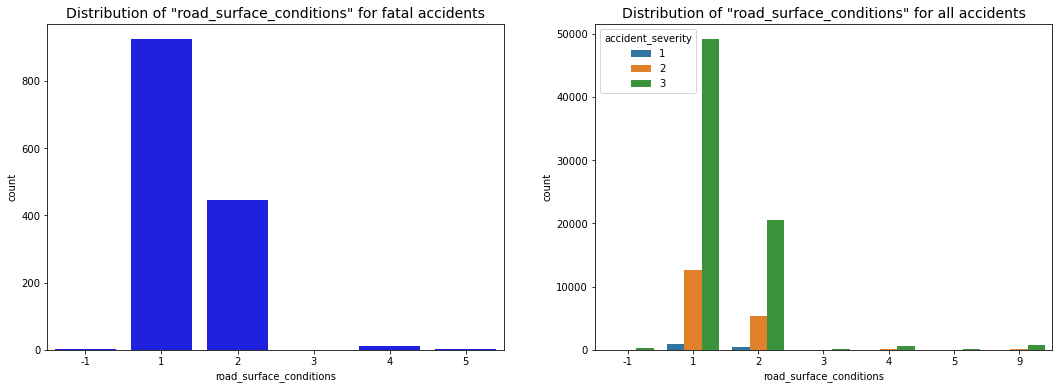

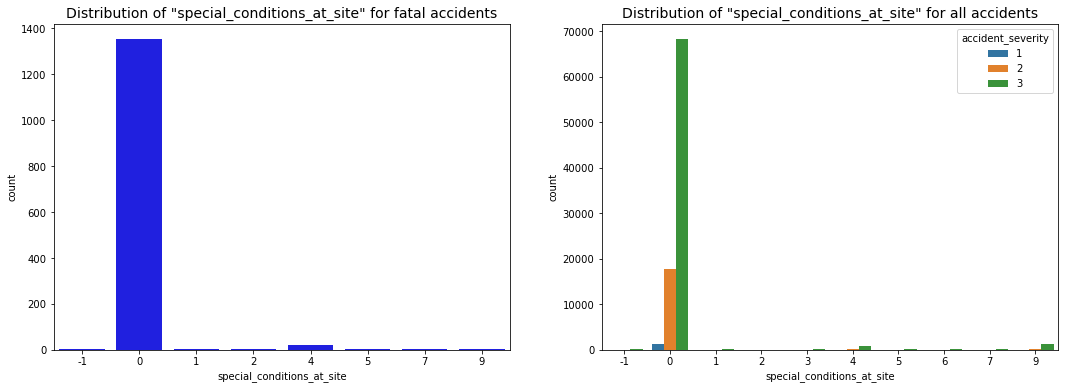

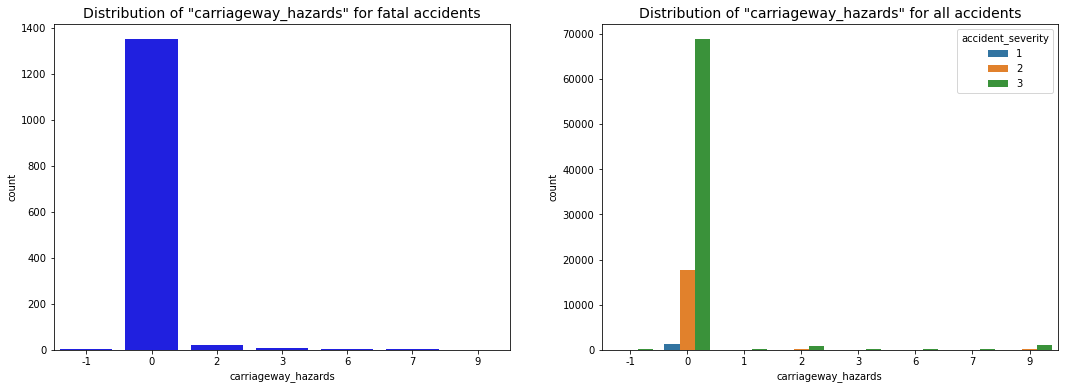

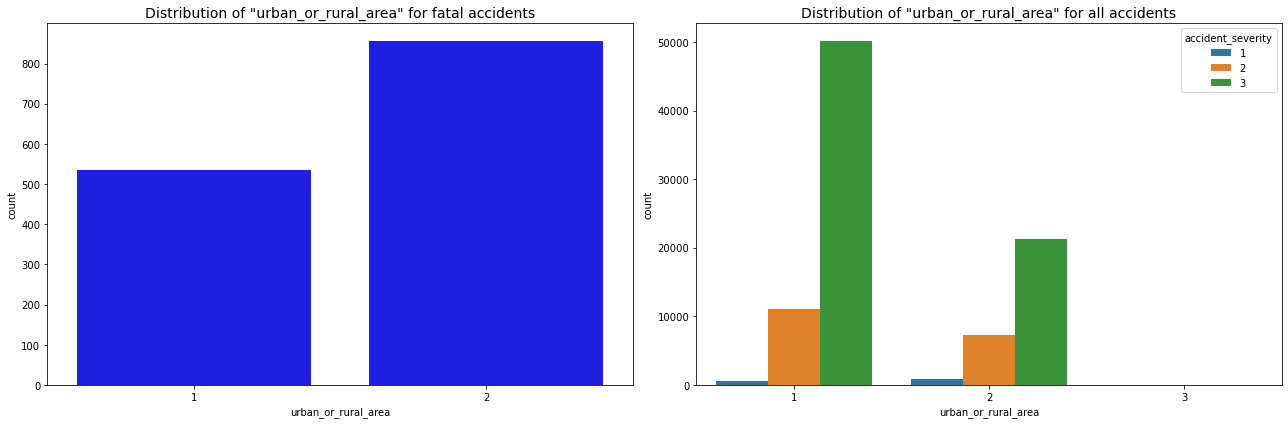

In [122]:
variable_plot = [
                   'first_road_class', 'road_type', 'speed_limit',
                   'junction_detail', 'junction_control', 'second_road_class',
                    'pedestrian_crossing_human_control',
                   'pedestrian_crossing_physical_facilities', 'light_conditions',
                   'weather_conditions', 'road_surface_conditions',
                   'special_conditions_at_site', 'carriageway_hazards',
                   'urban_or_rural_area']

for i, col in enumerate(variable_plot):
    if col == "accident_severity":
        pass
    else : 
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6), sharey= False)
        sns.countplot(x=col, data=major_accident, ax = ax1, color = 'b')
        ax1.set_title(f'Distribution of "{col}" for fatal accidents', fontsize = 14)
        sns.countplot(x=col, data=accidents, hue = "accident_severity", ax = ax2)
        ax2.set_title(f'Distribution of "{col}" for all accidents', fontsize = 14)
plt.tight_layout()

These plots show us when the pattern between fatal accidents and all accidents are different. We can see that it is different for the variables :
1. Speed limit = 60
2. junction_detail = Not at junction or within 20 metres
3. junction_control = Not at junction or within 20 metres
4. Light condition = Darkness - no lighting
5. urban_or_rural_area = Rural

<div class="alert alert-info">
    <b> Recommendation : Decrease speed limits  </b>
<p>This shows that fatal accidents occur mainly in a rural area where there is no junction and where the light condition are more often absent.
We can not conclude for sure that the no light or no junction conditions are the causes of the accidents. Indeed they are the normals conditions in rural areas. However it is quite clear than speed limit in a rural area increase the rate of fatals accidents.

<div class="alert alert-info">
<p>Let's see in what condition the fatal accidents occur mainly by crossing several variables and target more precisely when the fatal accidents happen.**

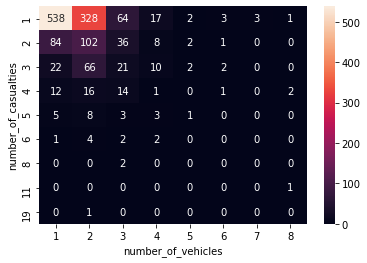

In [123]:
sns.heatmap(pd.crosstab(major_accident.number_of_casualties, major_accident.number_of_vehicles), annot = True, fmt="g");

<div class="alert alert-info">
    <b> Recommandations </b>
<p>On this matrice we can see that most of the fatal accidents involve one vehicle. This is interesting because it shows that the responsible is probably the driver alone (sleepiness, absent-mindedness, drugs consumption, etc...)

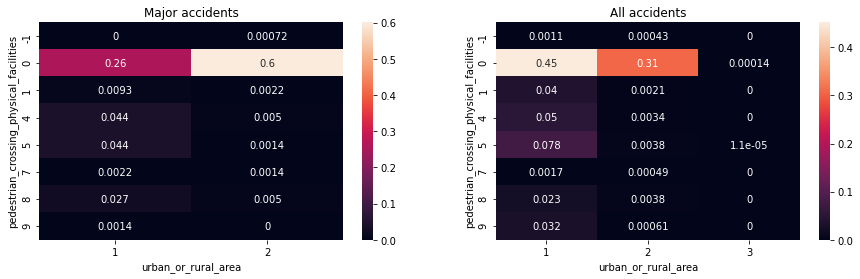

In [124]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,4))
sns.heatmap(pd.crosstab(major_accident.pedestrian_crossing_physical_facilities, major_accident.urban_or_rural_area, normalize=True ), annot = True, ax = ax1)
ax1.set_title("Major accidents")
sns.heatmap(pd.crosstab(accidents.pedestrian_crossing_physical_facilities, accidents.urban_or_rural_area, normalize=True ), annot = True, ax = ax2)
ax2.set_title("All accidents");


<div class="alert alert-info">
    <b> Recommendation : </b>
create more physical crossing facilities in urban areas

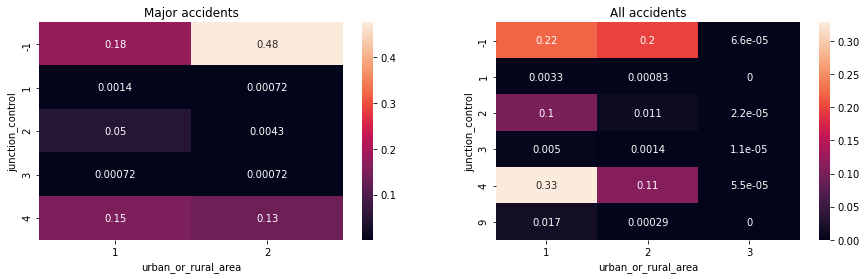

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,4))
sns.heatmap(pd.crosstab(major_accident.junction_control, major_accident.urban_or_rural_area, normalize=True ), annot = True, ax = ax1)
ax1.set_title("Major accidents")
sns.heatmap(pd.crosstab(accidents.junction_control, accidents.urban_or_rural_area, normalize=True ), annot = True, ax = ax2)
ax2.set_title("All accidents");

<div class="alert alert-info">
    <b> Recommendation </b>
<p>We observe here that accidents occur mainly at a junction control "Give way or uncontrolled" (4). Almost zero accidents happen at a junction control "Stop sign" (3). Maybe because there are much less stop sign in GB roads.
But if the number between stop signs and give away is similar, then a stop sign should be put at the give away junctions.